In [1]:
from pycocotools.coco import COCO
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torchvision
import cv2
from PIL import Image

In [2]:
def get_inference(img_path):
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True) 
  device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  model.eval()
  
  img = Image.open(img_path)

  img_tensor = torch.tensor(np.asarray(img)).permute(2,0,1).unsqueeze(0)
  img_tensor = img_tensor.float()/255.0 
  img_tensor = img_tensor.to(device)

  with torch.no_grad():
    pred = model(img_tensor)

  pred_indices = [i for i, x in enumerate(pred[0]['labels'] )]
  pred_boxes = pred[0]['boxes'][pred_indices].int().cpu().numpy()
  pred_score = list(pred[0]['scores'][pred_indices].cpu().numpy())

  return pred_indices, pred_boxes, pred_score

bounding box [ 544  781 1382 2623]
score 0.99967694


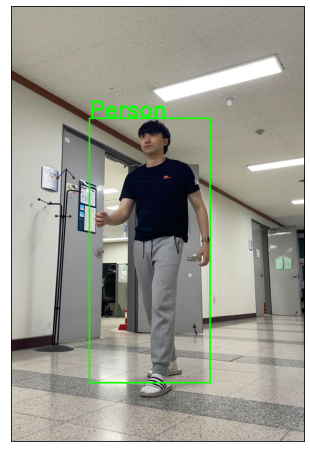

In [3]:
def object_detector(img_path, threshold):
  indices, boxes, scores = get_inference(img_path)

  for i in range(len(boxes)):
    if scores[i] > threshold:
      print('bounding box',boxes[i])
      print('score',scores[i])
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      x,y,w,h = boxes[i]

      img = cv2.rectangle(img, (x, y),(w,h), (10,255,0), 10)
      cv2.putText(img, 'Person', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 5, (10,255,0), 16)
      
      plt.figure(figsize=(10,8)) 
      plt.imshow(img) 
      plt.xticks([]) 
      plt.yticks([]) 
      plt.show()

img_path = './images/test_img.jpg'

object_detector(img_path, threshold=0.8)